#QR generation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group

In [ ]:
def qr_generation(start=100, stop=1000, step=100):
    return_dict = {'q_err_avrg': [], 'r_err_avrg': [],
                   'cond_true_q': [], 'cond_est_q': [],
                   'cond_true_r': [], 'cond_est_r': [],
                   'cond_true_a': [], 'cond_est_a': [],
                   'det_true_q': [], 'det_est_q': [],
                   'det_true_r': [], 'det_est_r': [],
                   'det_true_a': [], 'det_est_a': []}

    n = np.arange(start=start, stop=stop, step=step)

    for i in n:
        true_q = ortho_group.rvs(dim=i)
        true_r = np.triu(np.random.normal(size=(i, i)))

        diag_r = np.abs(np.diagonal(true_r))
        np.fill_diagonal(true_r, diag_r)

        A = np.dot(true_q, true_r)

        est_q, est_r = np.linalg.qr(A)
        est_A = np.dot(est_q, est_r)

        return_dict['q_err_avrg'].append(np.average(np.abs(true_q - est_q)))
        return_dict['r_err_avrg'].append(np.average(np.abs(true_r - est_r)))

        return_dict['cond_true_q'].append(np.linalg.cond(true_q))
        return_dict['cond_est_q'].append(np.linalg.cond(est_q))

        return_dict['cond_true_r'].append(np.linalg.cond(true_r))
        return_dict['cond_est_r'].append(np.linalg.cond(est_r))

        return_dict['cond_true_a'].append(np.linalg.cond(A))
        return_dict['cond_est_a'].append(np.linalg.cond(est_A))

        return_dict['det_true_q'].append(np.linalg.det(true_q))
        return_dict['det_est_q'].append(np.linalg.det(est_q))

        return_dict['det_true_r'].append(np.linalg.det(true_r))
        return_dict['det_est_r'].append(np.linalg.det(est_r))

        return_dict['det_true_a'].append(np.linalg.det(A))
        return_dict['det_est_a'].append(np.linalg.det(est_A))

    return return_dict, n


In [ ]:
def plot_lines(x, y, xlabel, ylabel, logarithmic=False, title=None):
    for k, v in y.items():
        plt.plot(x, v, label=k)
    
    if logarithmic:
        plt.yscale('log')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()


In [ ]:
return_dict, n = qr_generation()

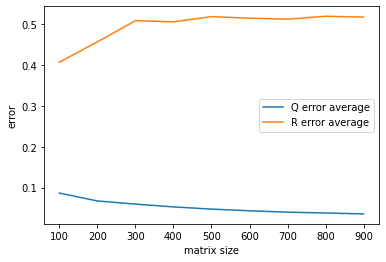

In [ ]:
plot_lines(x=n, y={'Q error average': return_dict['q_err_avrg'],
                   'R error average': return_dict['r_err_avrg']},
           xlabel='matrix size', ylabel='error')

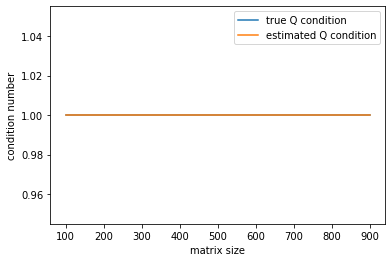

In [ ]:
plot_lines(x=n, y={'true Q condition': return_dict['cond_true_q'],
                   'estimated Q condition': return_dict['cond_est_q']},
           xlabel='matrix size', ylabel='condition number')

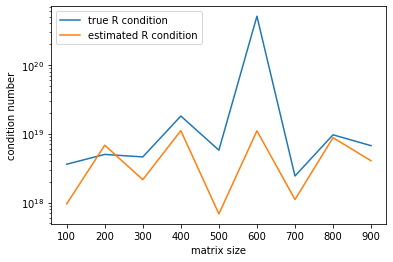

In [ ]:
plot_lines(x=n, y={'true R condition': return_dict['cond_true_r'],
                   'estimated R condition': return_dict['cond_est_r']},
           xlabel='matrix size', ylabel='condition number',
           logarithmic=True)

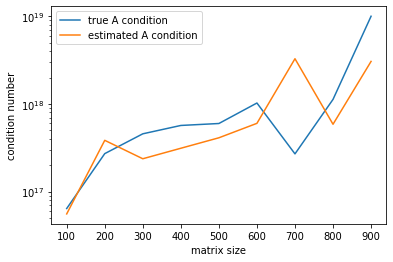

In [ ]:
plot_lines(x=n, y={'true A condition': return_dict['cond_true_a'],
                   'estimated A condition': return_dict['cond_est_a']},
           xlabel='matrix size', ylabel='condition number',
           logarithmic=True)

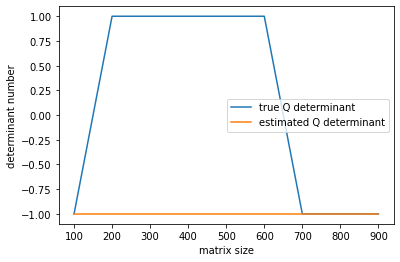

In [ ]:
Aplot_lines(x=n, y={'true Q determinant': return_dict['det_true_q'],
                   'estimated Q determinant': return_dict['det_est_q']},
           xlabel='matrix size', ylabel='determinant number')

Why signs of the determinants are different? Perhaps, it should go away after making R diagonal positive. Now positivity is implemented, but the result is still the same. 

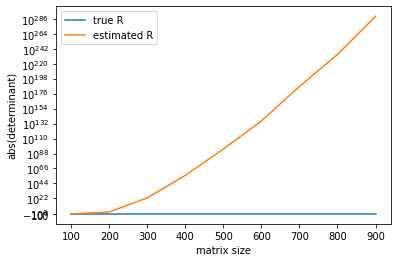

In [ ]:
# plot_lines(x=n, y={'true R abs(determinant)': np.abs(return_dict['det_true_r']),
#                    'estimated R': np.abs(return_dict['det_est_r'])},
#            xlabel='matrix size', ylabel='abs(determinant)')

plt.plot(n, np.abs(return_dict['det_true_r']), label='true R')
plt.plot(n, np.abs(return_dict['det_est_r']), label='estimated R')
plt.yscale('symlog')
plt.xlabel('matrix size')
plt.ylabel('abs(determinant)')
plt.legend()
plt.show()

Why determinants of these matrices are so different, while matrices themselves are quite similar?

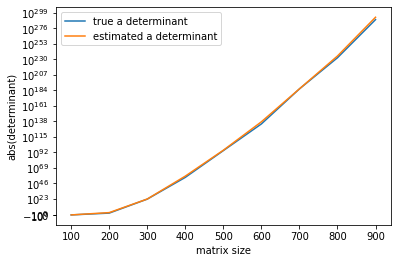

In [ ]:
# plot_lines(x=n, y={'true A determinant': return_dict['det_true_a'],
#                    'estimated R determinant': return_dict['det_est_a']},
#            xlabel='matrix size', ylabel='determinant number')

plt.plot(n, np.abs(return_dict['det_true_a']), label='true A determinant')
plt.plot(n, np.abs(return_dict['det_est_a']), label='estimated A determinant')
plt.yscale('symlog')
plt.xlabel('matrix size')
plt.ylabel('abs(determinant)')
plt.legend()
plt.show()